**Chainerをインストール**

In [ ]:
!pip install chainer

In [ ]:
import chainer

print(chainer.__version__)

7.8.1


In [ ]:
!python -c 'import chainer; chainer.print_runtime_info()'

Platform: Linux-6.1.85+-x86_64-with-glibc2.35
Chainer: 7.8.1
ChainerX: Not Available
NumPy: 1.26.4
CuPy:
  OS                           : Linux-6.1.85+-x86_64-with-glibc2.35
  Python Version               : 3.10.12
  CuPy Version                 : 12.2.0
  CuPy Platform                : NVIDIA CUDA
  NumPy Version                : 1.26.4
  SciPy Version                : 1.13.1
  Cython Build Version         : 0.29.36
  Cython Runtime Version       : 3.0.11
  CUDA Root                    : /usr/local/cuda
  nvcc PATH                    : /usr/local/cuda/bin/nvcc
  CUDA Build Version           : 12020
  CUDA Driver Version          : 12020
  CUDA Runtime Version         : 12020
  cuBLAS Version               : 120205
  cuFFT Version                : 11008
  cuRAND Version               : 10303
  cuSOLVER Version             : (11, 5, 2)
  cuSPARSE Version             : 12102
  NVRTC Version                : (12, 2)
  Thrust Version               : 200101
  CUB Build Version            : 

**Chainerの基本部品のインポート**

In [ ]:
import numpy as np
import chainer

**MNISTのデータをロードする**(手書き数字の画像データセットが70000個ある)。データを取得してtrain_data(学習用データ)とtest_data(検証用データ)に分けてデータを格納する。

In [ ]:
import numpy as np
import chainer
from chainer.datasets import tuple_dataset

# 手動でMNISTデータをダウンロードする
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 画像を1次元に変換
train_images = train_images.reshape(-1, 784).astype(np.float32) / 255
test_images = test_images.reshape(-1, 784).astype(np.float32) / 255

# データセットとしてChainerに渡す
train_data = tuple_dataset.TupleDataset(train_images, train_labels.astype(np.int32))
test_data = tuple_dataset.TupleDataset(test_images, test_labels.astype(np.int32))
print(train_data)
print(test_data)

**数字の画像を見る**

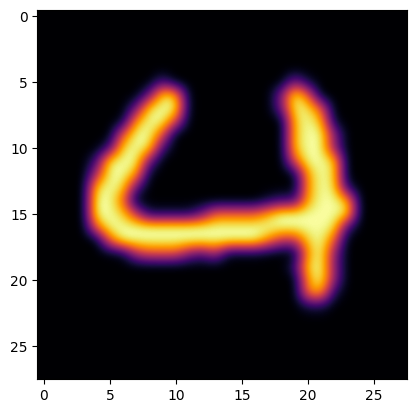

In [ ]:
import matplotlib.pyplot as plt

data_location=60
data, teacher_label = train_data[data_location]
plt.imshow(data.reshape(28, 28), cmap='inferno', interpolation='bicubic')
plt.show()

In [ ]:
print(teacher_label)

4


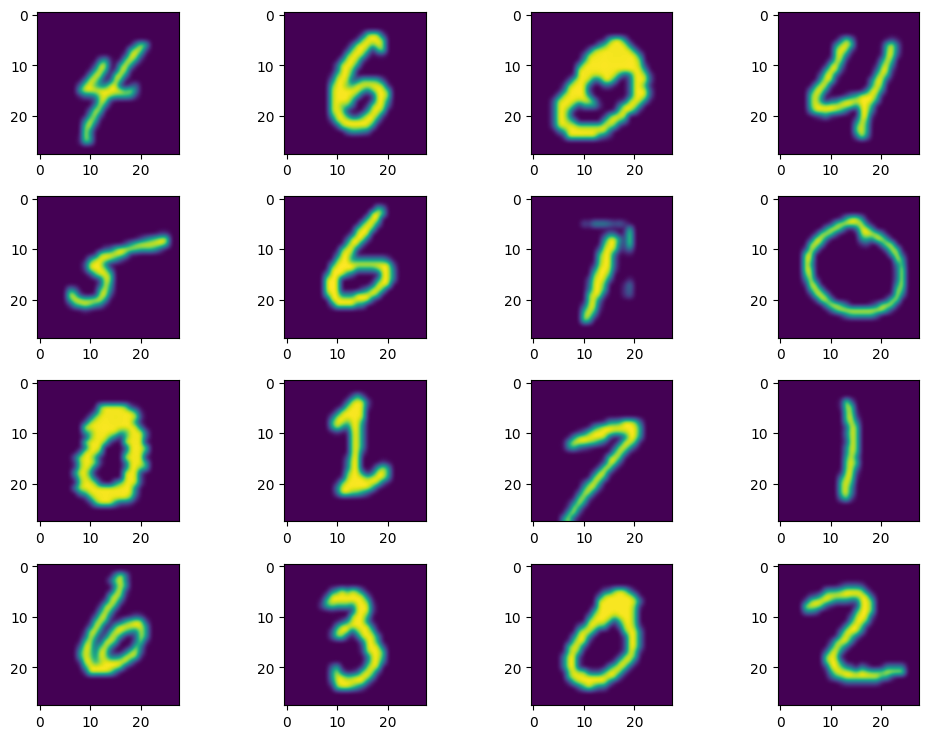

In [ ]:
# 数字を表示するための行と列の数
# 行
ROWS_COUNT = 4
# 列
COLUMNS_COUNT = 4
#
DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT
# データオブジェクト保持用
subfig = []
# x軸データ
x = np.linspace(-1, 1, 10)

# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9))

#
for i in range(1, DIGIT_GRAPH_COUNT + 1):
    # 順序i番目のsubfigに追加します
    subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))
    # y軸データ(n次式)
    y = x ** i
    data, teacher_label = train_data[60+i]
    subfig[i - 1].imshow(data.reshape(28, 28),interpolation='bicubic', cmap='viridis')

# グラフ間の横と縦の間隔の調整
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

**学習用データセットと検証用データセットの数を表示**

In [ ]:
print('学習用データセットの数:', len(train_data))
print('検証用データセットの数:', len(test_data))

学習用データセットの数: 60000
検証用データセットの数: 10000


**調理手順**

**必要なパッケージをインポートする**

In [ ]:
import chainer
import chainer.links as L
import chainer.function as F

**ニューラルネットワークの定義**

In [ ]:
class MLP(chainer.Chain):
  def __init__(self, number_hidden_units=1000, number_out_units=10):
    # 親クラスのコンストラクタを呼び出し、必要な初期化を行います。
    super(MLP, self).__init__()
    #
    with self.init_scope():
      self.layer1=L.Linear(None, number_hidden_units)
      self.layer2=L.Linear(number_hidden_units, number_hidden_units)
      self.layer3=L.Linear(number_hidden_units, number_out_units)

  def __call__(self, input_data):
    #
    result1 = F.relu(self.layer1(input_data))
    result2 = F.relu(self.layer2(result1))
    return self.layer3(result2)

In [ ]:
model=MLP()

In [ ]:
print('入力層のバイアスパラメータ配列の形は', model.layer1.b.shape)

print('初期化直後のその値は、', model.layer1.b.data)

入力層のバイアスパラメータ配列の形は (1000,)
初期化直後のその値は、 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

In [ ]:
print('学習前の入力層の重み配列', model.layer1.W.array)

学習前の入力層の重み配列 None


**iteratorsとは**連続処理をシンプルにするための反復子である

In [ ]:
from chainer import iterators

BATCH_SIZE = 100

train_iterator = iterators.SerialIterator(train_data, BATCH_SIZE)
test_iterator = iterators.SerialIterator(test_data, BATCH_SIZE,
                                     repeat=False, shuffle=False)

**Optimizerの設定**

In [ ]:
from chainer import optimizers

optimizer = optimizers.SGD(lr=0.01)
optimizer.setup(model)

**検証の処理ブロック**

必要なモジュールをインポートする。学習の回数MAX_EPOCHも設定する。

In [ ]:
import numpy as np
from chainer.dataset import concat_examples
# from chainer.cuda import to_cpu
import matplotlib.pyplot as plt

MAX_EPOCH = 20

In [ ]:
# def testEpoch(model, test_iterator):
# # 学習誤差の表示
# #   print('学習回数:{:02d} --> 学習誤差:{:.02f} '.format(
# #       train_iterator.epoch, float(to_cpu(loss.data))), end='')

#   print('学習回数:{:02d} --> 学習誤差:{:.02f} '.format(
#       train_iterator.epoch, float(loss.data)), end='')
#   # 検証用誤差と精度
#   test_losses = []
#   test_accuracies = []
#   #
#   while True:
#     test_dataset = test_iterator.next()
#     test_data, test_teacher_labels = concat_examples(test_dataset)

#     # 検証データをモデルに渡します
#     prediction_test = model(test_data)

#     # 検証データに対して得られた予測値と教師ラベルデータと比較して、誤差の計算をします
#     loss_test = F.softmax_cross_entropy(prediction_test, test_teacher_labels)
# #     test_losses.append(to_cpu(loss_test.data))
#     test_losses.append(loss_test.data)


#     # 精度を計算します
#     accuracy = F.accuracy(prediction_test, test_teacher_labels)
# #     accuracy.to_cpu()
#     test_accuracies.append(accuracy.data)

#     if test_iterator.is_new_epoch:
#       test_iterator.epoch = 0
#       test_iterator.current_position = 0
#       test_iterator.is_new_epoch = False
#       test_iterator._pushed_position = None
#       break

#     print('検証誤差:{:.04f} 検証精度:{:.02f}'.format(
#           np.mean(test_losses), np.mean(test_accuracies)))

**学習と検証**

In [ ]:
# import chainer.functions as F
# from chainer.dataset import concat_examples

# while train_iterator.epoch < MAX_EPOCH:
#     # エポック内のバッチループ
#     for train_dataset in train_iterator:
#         # 学習データを学習データと教師ラベルデータにアンパックします
#         train_data, teacher_labels = concat_examples(train_dataset)

#         # モデルにかけて、予測値の計算をします
#         prediction_train = model(train_data)

#         # 得られた予測値と教師ラベルデータと比較して、学習誤差の計算をします
#         loss = F.softmax_cross_entropy(prediction_train, teacher_labels)

#         # ニューラルネットワークの中の勾配の計算をします
#         model.cleargrads()
#         # 誤差を逆伝播します
#         loss.backward()

#         # 誤差を反映して、パラメータの更新をします
#         optimizer.update()

#     # エポックが終了したら検証データに対する予測精度を計ります
#     if train_iterator.is_new_epoch:
#         testEpoch(model, test_iterator)
#         test_iterator.reset()

In [ ]:
import chainer.functions as F
from chainer.dataset import concat_examples
import numpy as np

def testEpoch(model, test_iterator):
    print('学習回数:{:02d} --> 学習誤差:{:.02f} '.format(
        train_iterator.epoch, float(loss.data)), end='')

    # 検証用誤差と精度
    test_losses = []
    test_accuracies = []

    # 検証ループ
    for test_dataset in test_iterator:
        test_data, test_teacher_labels = concat_examples(test_dataset)

        # 検証データをモデルに渡します
        prediction_test = model(test_data)

        # 検証データに対して得られた予測値と教師ラベルデータと比較して、誤差の計算をします
        loss_test = F.softmax_cross_entropy(prediction_test, test_teacher_labels)
        test_losses.append(loss_test.array)  # .data ではなく .array を使用

        # 精度を計算します
        accuracy = F.accuracy(prediction_test, test_teacher_labels)
        test_accuracies.append(accuracy.array)  # .data ではなく .array を使用

    # イテレータのリセット
    test_iterator.reset()

    print('検証誤差:{:.04f} 検証精度:{:.02f}'.format(
        np.mean(test_losses), np.mean(test_accuracies)))

In [ ]:
while train_iterator.epoch < MAX_EPOCH:
    # 学習データセットを反復子から取り出します
    train_dataset = train_iterator.next()

    # 学習データを学習データと教師ラベルデータにアンパックします
    train_data, teacher_labels = concat_examples(train_dataset)

    # モデルにかけて、予測値の計算をします
    prediction_train = model(train_data)

    # 得られた予測値と教師ラベルデータと比較して、学習誤差の計算をします
    loss = F.softmax_cross_entropy(prediction_train, teacher_labels)

    # ニューラルネットワークの中の勾配の計算をします
    model.cleargrads()
    # 誤差を逆伝播します
    loss.backward()

    # 誤差を反映して、パラメータの更新をします
    optimizer.update()

    # 一回学習（epoch）が終わったら検証データに対する予測精度を計ります
    if train_iterator.is_new_epoch:
        testEpoch(model, test_iterator)

学習回数:01 --> 学習誤差:0.49 検証誤差:0.4736 検証精度:0.88
学習回数:02 --> 学習誤差:0.36 検証誤差:0.3443 検証精度:0.90
学習回数:03 --> 学習誤差:0.42 検証誤差:0.2984 検証精度:0.92
学習回数:04 --> 学習誤差:0.31 検証誤差:0.2734 検証精度:0.92
学習回数:05 --> 学習誤差:0.28 検証誤差:0.2550 検証精度:0.93
学習回数:06 --> 学習誤差:0.20 検証誤差:0.2402 検証精度:0.93
学習回数:07 --> 学習誤差:0.34 検証誤差:0.2241 検証精度:0.94
学習回数:08 --> 学習誤差:0.23 検証誤差:0.2131 検証精度:0.94
学習回数:09 --> 学習誤差:0.41 検証誤差:0.2028 検証精度:0.94
学習回数:10 --> 学習誤差:0.17 検証誤差:0.1932 検証精度:0.94
学習回数:11 --> 学習誤差:0.25 検証誤差:0.1837 検証精度:0.95
学習回数:12 --> 学習誤差:0.13 検証誤差:0.1759 検証精度:0.95
学習回数:13 --> 学習誤差:0.17 検証誤差:0.1690 検証精度:0.95
学習回数:14 --> 学習誤差:0.17 検証誤差:0.1639 検証精度:0.95
学習回数:15 --> 学習誤差:0.13 検証誤差:0.1572 検証精度:0.95
学習回数:16 --> 学習誤差:0.20 検証誤差:0.1514 検証精度:0.96
学習回数:17 --> 学習誤差:0.22 検証誤差:0.1455 検証精度:0.96
学習回数:18 --> 学習誤差:0.09 検証誤差:0.1413 検証精度:0.96
学習回数:19 --> 学習誤差:0.18 検証誤差:0.1363 検証精度:0.96
学習回数:20 --> 学習誤差:0.11 検証誤差:0.1348 検証精度:0.96


In [ ]:
print('入力層のバイアスパラメータ配列の形状は', model.layer1.b.shape)
#
print('学習後の入力層の値は、', model.layer1.b.data)
# 入力層の重み配列
print('学習後の入力層の重み配列',model.layer1.W.array)
print('学習後の入力層の重み配列の形状は',model.layer1.W.array.shape)

入力層のバイアスパラメータ配列の形状は (1000,)
学習後の入力層の値は、 [ 1.48052676e-03  2.44983763e-04  2.21068179e-03 -3.40903015e-03
  2.32107146e-03  3.74779012e-03  4.35874378e-03 -4.95538162e-03
 -1.92482665e-03  5.11305826e-03  1.04405945e-02  3.75844468e-03
  4.94557573e-03 -6.61332102e-04  1.32599827e-02  2.14315262e-02
  1.66649045e-03 -7.10786786e-04  2.57237372e-03  6.94123190e-03
  9.55612026e-03  1.56558380e-02 -1.78615504e-04 -2.15910445e-03
  9.31863114e-03  4.01777029e-03  8.73184297e-03  6.17342396e-03
  1.81939173e-02  2.06714049e-02  6.23363128e-04  1.44464872e-03
  1.08331721e-02 -2.23251968e-03  6.86717127e-03  1.35361971e-02
  5.28386934e-03  5.49723906e-03 -1.18130224e-03  5.45814680e-03
 -3.62870487e-04 -3.46059469e-03  4.79468238e-03  4.46620351e-03
  5.83579158e-03  7.37257442e-03 -2.38794414e-03 -1.87358155e-03
  2.44246825e-04  2.20440887e-03  4.84731235e-03 -1.88674906e-03
  7.69924605e-03  1.45794079e-02  8.85451562e-04  1.72784962e-02
  2.13274756e-03  1.34883849e-02  5.20141050e-03  

**学習済モデルの保存**

In [ ]:
from chainer import serializers

serializers.save_npz('chainer-mnist.model', model)

# 保存されているかどうかを確認します
%ls -la

total 6536
drwxr-xr-x 1 root root    4096 Aug 22 03:55 ./
drwxr-xr-x 1 root root    4096 Aug 22 02:21 ../
-rw-r--r-- 1 root root 6675439 Aug 22 03:55 chainer-mnist.model
drwxr-xr-x 4 root root    4096 Aug 20 13:22 .config/
drwxr-xr-x 1 root root    4096 Aug 20 13:23 sample_data/


**学習済モデルのダウンロード**

In [ ]:
from google.colab import files
files.download('chainer-mnist.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**学習済のモデルを使う**

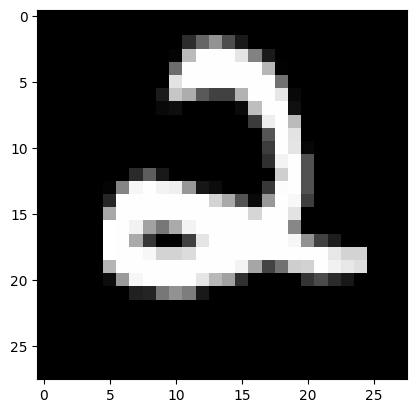

predict_lable: 2


In [ ]:
model = MLP()

# 学習済モデルファイルをロードします
serializers.load_npz('chainer-mnist.model', model)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 画像を1次元に変換
train_images = train_images.reshape(-1, 784).astype(np.float32) / 255
test_images = test_images.reshape(-1, 784).astype(np.float32) / 255

# データセットとしてChainerに渡す
train_data = tuple_dataset.TupleDataset(train_images, train_labels.astype(np.int32))
test_data = tuple_dataset.TupleDataset(test_images, test_labels.astype(np.int32))
data_location=6423
# 検証データの一つを使います
predict_data, predict_lable = test_data[data_location]
plt.imshow(predict_data.reshape(28, 28), cmap='gray')
plt.show()
print('predict_lable:', predict_lable)

In [ ]:
# 分類したいデータをモデルに渡します
predict_data = predict_data[None, ...]
#
predict = model(predict_data)
result= predict.array
print(result)
probable_label = result.argmax(axis=1)
print('一番可能性の高いのは:', probable_label[0])

[[ 1.8801857 -6.367602  14.644812   1.7680322  1.2764671 -3.5954149
   5.0720534 -9.662883   0.2840299 -5.8450933]]
一番可能性の高いのは: 2
